# 3.1 Linear

In [44]:
from docplex.mp.model import Model
from docplex.mp.environment import Environment
import numpy as np
from random import randrange

### Import du fichier

In [45]:
def fillUntilIndex(val, ind):
    while(len(val) < int(ind)+1):
        val.append(0)

In [83]:
xdata = {}

maxCount = 100
count = 0
with open('../data_in/Amazon0302.txt','r') as file:
    for line in file:
        count = count +1
        if (count > maxCount):
            break
        a,b = line.split(" ")
        try:
            xdata[(int(a),int(b))] = randrange(5)
        except Exception as e:
            print(e)
            '''
            print(a,"/",b)
            print("line:",line)
            '''

In [84]:
max = -1
for (a,b) in xdata:
    if (a > max):
        max = a
    if (b > max):
        max = b
print(max)
#ydata = [0 for e in range(0,max+1)]
ydata = [e for e in range(0,max+1)]
'''for (a,b) in xdata:
    ydata[a] = randrange(5)
    ydata[b] = randrange(5)
'''

290


'for (a,b) in xdata:\n    ydata[a] = randrange(5)\n    ydata[b] = randrange(5)\n'

### Code

In [48]:
#graph = [(1,3,10),(3,2,20),(2,1,30)]
#gy = [20,10,30]
#(from,to,val)
V_NB = 3
E_NB = 3

V_Range = range(0,V_NB)
E_Range = range(0,E_NB)

vals = {}
vals[(0,2)] = 10
vals[(2,1)] = 20
vals[(1,0)] = 30

#valsy = [0 for e in V_Range]
valsy = [e for e in V_Range]

In [70]:
#Graphe étoile
V_NB = 7
E_NB = 11

V_Range = range(0,V_NB)
E_Range = range(0,E_NB)

vals = {}
vals[(0,1)] = 10
vals[(0,2)] = 20
vals[(0,3)] = 30
vals[(0,4)] = 40
vals[(1,2)] = 50
vals[(1,3)] = 60
vals[(1,4)] = 70
vals[(2,3)] = 80
vals[(2,4)] = 90
vals[(2,5)] = 100
vals[(3,4)] = 110

#valsy = [0 for e in V_Range]
valsy = [e for e in V_Range]

In [85]:
vals = xdata
valsy = ydata

In [86]:
def a(i):
    return "y_"+i

m = Model(name='FraudGraph')
#x = m.integer_var_matrix(V_Range, E_Range, lambda ij: "x_%d_%d" %(ij[0], ij[1]))
x = m.continuous_var_dict(vals,lb=0,name='x')

#x = m.continuous_var_matrix(V_NB, E_NB, lambda ij: "x_%d_%d" %(ij[0], ij[1]))
y = m.continuous_var_list(valsy,lb=0, name='y')  #,key_format=lambda i: "x_%d" %(i[0]))

#y = m.continuous_var_list(valsy,lb=0,name="y")

c1 = m.add_constraints(x[(i,j)] <=y[i] for (i,j) in x)
c2 = m.add_constraints(x[(i,j)] <=y[j] for (i,j) in x)

#A check si pas m.sum
c3 = m.add_constraint( np.sum(y) <= 1)
#c3 = m.add_constraint( m.sum(y[i] <= 1 for i in V_Range))


#Deux condition fait par ub et lb
#c4 = m.add_constraint( y[i] >= 0 for i in V_Range)
#c5 = m.add_constraint( x[i,j] >= 0 for i in V_Range for j in E_Range)

#m.set_objective("min", 3*x)
m.maximize( m.sum(x[(i,j)] for (i,j) in x))


m.print_information()
m.solve()
m.print_solution(print_zeros=False)

Model: FraudGraph
 - number of variables: 391
   - binary=0, integer=0, continuous=391
 - number of constraints: 201
   - linear=201
 - parameters: defaults
 - objective: maximize
 - problem type is: LP
objective: 2.889
  x_0_1=0.056
  x_0_2=0.056
  x_0_4=0.056
  x_0_5=0.056
  x_1_0=0.056
  x_1_2=0.056
  x_1_4=0.056
  x_1_5=0.056
  x_2_0=0.056
  x_2_11=0.056
  x_2_13=0.056
  x_4_7=0.056
  x_4_16=0.056
  x_4_17=0.056
  x_4_19=0.056
  x_5_6=0.056
  x_5_7=0.056
  x_5_8=0.056
  x_5_9=0.056
  x_5_10=0.056
  x_6_5=0.056
  x_6_7=0.056
  x_6_8=0.056
  x_6_9=0.056
  x_6_20=0.056
  x_7_5=0.056
  x_7_8=0.056
  x_7_9=0.056
  x_7_30=0.056
  x_8_13=0.056
  x_8_23=0.056
  x_10_5=0.056
  x_10_7=0.056
  x_11_6=0.056
  x_11_9=0.056
  x_11_20=0.056
  x_13_20=0.056
  x_13_23=0.056
  x_16_4=0.056
  x_16_7=0.056
  x_16_19=0.056
  x_17_6=0.056
  x_17_7=0.056
  x_17_8=0.056
  x_17_30=0.056
  x_19_4=0.056
  x_19_16=0.056
  x_20_6=0.056
  x_20_7=0.056
  x_20_8=0.056
  x_20_23=0.056
  x_20_30=0.056
  y_0=0.056
 

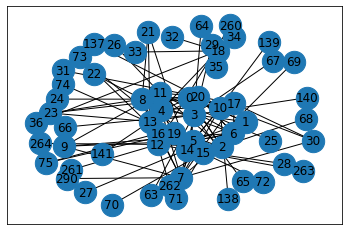

In [98]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
#G.add_edges_from(
#    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
#     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])
nodes = [e for e in vals]

G.add_edges_from(nodes)
'''
val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]
'''
black_edges = [edge for edge in G.edges()]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G,k=0.5, iterations=20)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()